# **Covid - 19 Data Analysis Project using Python**

# Dataset link :



Url = https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the dataset using Pandas from above mentioned url.
url="https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df=pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,31/12/19,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,01/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,02/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,03/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,04/01/20,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57389,NaN,NaN,International,13/11/20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57390,NaN,NaN,International,14/11/20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57391,NaN,NaN,International,15/11/20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57392,NaN,NaN,International,16/11/20,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# High Level Data Understanding:

In [3]:
#Find no. of rows & columns in the dataset

print("no_of_rows = ",df.shape[0])
print("no_of_cols = ",df.shape[1])     

no_of_rows =  57394
no_of_cols =  49


In [4]:
#Data types of columns

df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [5]:
#Info of data in dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
#describe of data in dataframe

df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.375800e+04,56465.000000,55652.000000,4.436800e+04,56465.000000,55652.000000,53471.000000,56401.000000,55587.000000,44096.000000,56401.000000,55587.000000,37696.000000,4490.000000,4490.000000,5005.000000,5005.000000,357.000000,357.000000,645.000000,645.000000,2.201700e+04,2.178700e+04,22017.000000,21787.000000,2.461200e+04,24612.000000,22802.000000,23211.000000,47847.000000,5.707100e+04,54371.000000,51034.000000,50265.000000,50768.000000,50367.000000,33571.000000,51013.000000,52881.000000,39669.000000,39156.000000,24176.000000,45936.000000,56336.000000,49247.000000
mean,1.677974e+05,1953.576941,1920.431953,6.858639e+03,47.054317,46.835439,3139.099982,39.344804,38.403211,95.335293,0.679569,0.667060,1.044593,726.191982,13.264264,3867.245355,76.562638,249.262364,7.284022,2230.688121,60.655074,2.309838e+06,2.847832e+04,78.917684,0.916091,2.738971e+04,0.897875,182.917899,0.067968,56.981128,8.559938e+07,360.490650,31.189576,9.179238,5.800115,20620.172071,12.435453,252.646642,8.070269,10.741569,32.642686,52.089636,3.089724,73.937780,0.722223
std,1.693038e+06,18269.650340,17777.391785,5.578081e+04,390.853776,378.272794,6183.455260,133.985155,101.649441,180.721699,3.026430,1.968914,0.395932,2031.110506,18.788717,9952.989504,109.079014,545.005400,18.182646,5305.474602,174.848637,1.053218e+07,1.149094e+05,157.727167,1.696732,1.059809e+05,1.569310,877.852736,0.088833,25.845576,6.017270e+08,1639.740138,9.044262,6.297170,4.295740,20310.999832,19.427924,117.522344,4.189605,10.470743,13.453566,31.645306,2.513193,7.397016,0.153261
min,1.000000e+00,-8261.000000,-552.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2212.545000,-269.978000,0.000000,-67.901000,-9.678000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-3.743000e+03,0.000000,-0.398000,0.000000e+00,0.000000,1.535000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,1.800000e+02,0.000000,0.857000,1.300000e+01,0.000000,0.000000,90.033000,0.000000,0.260000,3.977750,0.000000,0.000000,0.870000,9.000000,1.683750,38.000000,10.554000,4.027000,0.816000,20.137000,4.167000,6.082500e+04,1.039000e+03,4.047000,0.073000,1.108750e+03,0.074000,10.607500,0.010000,39.810000,1.326539e+06,37.728000,23.200000,3.552000,2.085000,5321.444000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,2.070000e+03,14.000000,19.429000,8.400000e+01,0.000000,0.286000,593.663000,2.194000,3.863000,20.383000,0.000000,0.028000,1.040000,48.000000,5.901000,213.000000,35.548000,25.778000,2.083000,146.811000,14.997000,2.656400e+05,3.715000e+03,20.965000,0.344000,4.024000e+03,0.350500,29.369000,0.033000,60.650000,8.278737e+06,88.125000,31.100000,6.933000,4.393000,13913.839000,2.000000,238.339000,7.110000,6.400000,31.400000,52.232000,2.500000,75.345000,0.752000
75%,2.235675e+04,235.000000,245.286000,7.270000e+02,4.000000,4.000000,3487.050000,25.941000,29.678500,90.571250,0.294000,0.420000,1.220000,293.000000,17.462000,1617.000000,93.386000,233.091000,6.07600

# Low Level Data Understanding :

In [7]:
#Find count of unique values in location column.

df['location'].nunique()

216

In [36]:
#Find which continent has maximum frequency using values counts.

df['continent'].value_counts()

Europe           14828
Africa           13637
Asia             13528
North America     9116
South America     3404
Oceania           2235
Name: continent, dtype: int64

In [9]:
#Find maximum & mean value in 'total_cases'.

print("Maximum value: ",df['total_cases'].max())
print("Mean value: ",df['total_cases'].mean())

Maximum value:  55154651.0
Mean value:  167797.3688753302


In [10]:
#Find 25%,50% & 75% quartile value in 'total_deaths'.

print("25% ",df['total_deaths'].describe()[4])
print("50% ",df['total_deaths'].describe()[5])
print("75% ",df['total_deaths'].describe()[6])

25%  13.0
50%  84.0
75%  727.0


In [35]:
#Find which continent has maximum 'human_development_index'.

df.groupby(['continent']).agg({'human_development_index':'max'})

,human_development_index
continent,
Africa,0.797
Asia,0.933
Europe,0.953
North America,0.926
Oceania,0.939
South America,0.843


In [38]:
#Find which continent has minimum 'gdp_per_capita'.

df.groupby(['continent']).agg({'gdp_per_capita':'min'})

,gdp_per_capita
continent,
Africa,661.240
Asia,1479.147
Europe,5189.972
North America,1653.173
Oceania,2205.923
South America,6885.829


In [42]:
# Filter the dataframe with only this columns ['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index'] 
# and update the data frame.

df=df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


# Data Cleaning

In [50]:
#Remove all duplicates observations

df.drop_duplicates()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


In [52]:
#Find missing values in all columns

df.isnull()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,False,False,False,True,True,False,False
1,False,False,False,True,True,False,False
2,False,False,False,True,True,False,False
3,False,False,False,True,True,False,False
4,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...
57389,True,False,False,False,False,True,True
57390,True,False,False,False,False,True,True
57391,True,False,False,False,False,True,True
57392,True,False,False,False,False,True,True


In [56]:
# Remove all observations where continent column value is missing

df.dropna(subset=['continent'])

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


In [58]:
#Fill all missing values with 0

df.fillna(0)

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
57389,0,International,13/11/20,696.0,7.0,0.000,0.000
57390,0,International,14/11/20,696.0,7.0,0.000,0.000
57391,0,International,15/11/20,696.0,7.0,0.000,0.000
57392,0,International,16/11/20,696.0,7.0,0.000,0.000


 Date time format :

In [59]:
#Convert date column in datetime format using pandas.to_datetime

df['date'] = pd.to_datetime(df['date'])

In [60]:
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,2020-11-13,696.0,7.0,NaN,NaN
57390,NaN,International,2020-11-14,696.0,7.0,NaN,NaN
57391,NaN,International,2020-11-15,696.0,7.0,NaN,NaN
57392,NaN,International,2020-11-16,696.0,7.0,NaN,NaN


In [61]:
#Create new column month after extracting month data from date column.

df['month']= df['date'].dt.month

In [62]:
df.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Asia,Afghanistan,2019-12-31,NaN,NaN,1803.987,0.498,12
1,Asia,Afghanistan,2020-01-01,NaN,NaN,1803.987,0.498,1
2,Asia,Afghanistan,2020-02-01,NaN,NaN,1803.987,0.498,2
3,Asia,Afghanistan,2020-03-01,NaN,NaN,1803.987,0.498,3
4,Asia,Afghanistan,2020-04-01,NaN,NaN,1803.987,0.498,4


## **Data Aggregation:**

In [66]:
#Find max value in all columns using groupby function on 'continent' column

df.groupby(["continent"]).max().reset_index()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


In [67]:
#Store the result in a new dataframe named 'df_groupby'.

df_groupby = df.groupby(["continent"]).max().reset_index()

In [68]:
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


# Feature Engineering :

In [77]:
# Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'

df_groupby['total_deaths_to_total_cases'] = df['total_deaths']/df['total_cases']

In [78]:
df_groupby.head()

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month,total_deaths_to_total_cases
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12,NaN
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12,NaN
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12,NaN
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12,NaN
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12,NaN


# Data Visualization :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

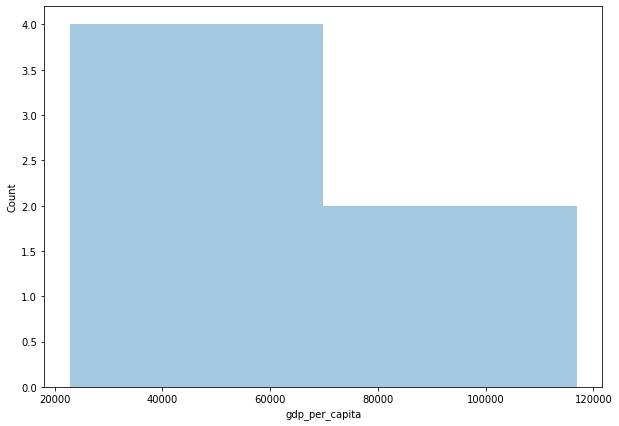

In [81]:
#Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.

plt.figure(figsize=(10,7))

sns.distplot(df_groupby['gdp_per_capita'],kde = False , hist=True)
plt.xlabel("gdp_per_capita")
plt.ylabel("Count")

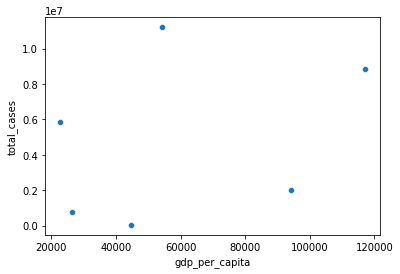

In [82]:
# Plot a scatter plot of 'total_cases' & 'gdp_per_capita'

sns.scatterplot(data=df_groupby,x='gdp_per_capita',y='total_cases')

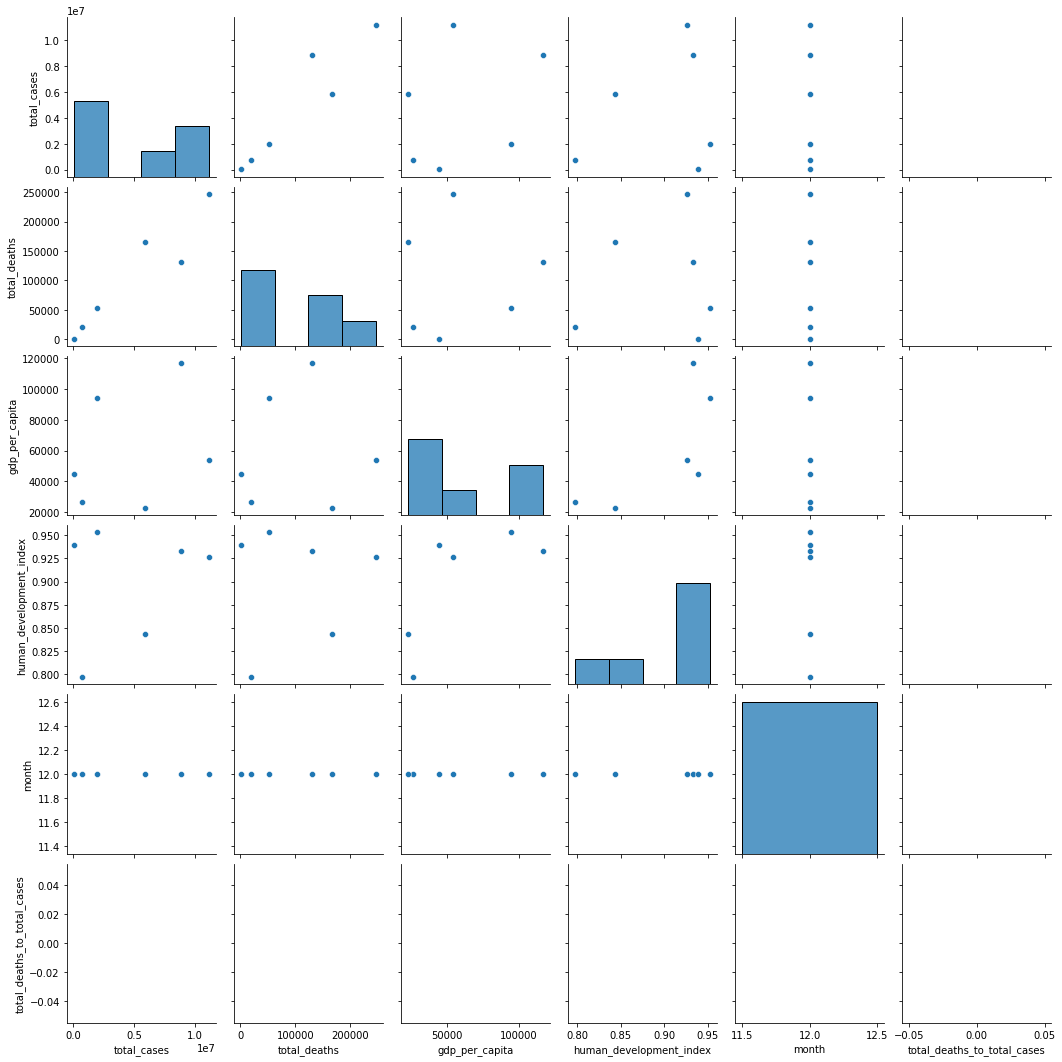

In [83]:
# Plot Pairplot on df_groupby dataset.

sns.pairplot(data=df_groupby)

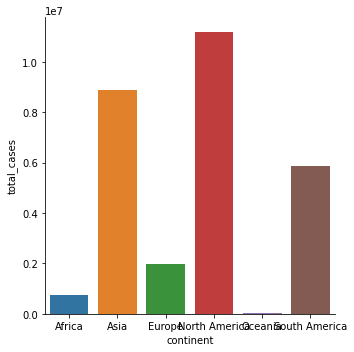

In [84]:
# Plot a bar plot of 'continent' column with 'total_cases' .

sns.catplot(data=df_groupby, x ="continent" , y ="total_cases" ,kind='bar')

In [85]:
# Save the df_groupby data frame in your local drive using pandas.to_csv function 

df_groupby.to_csv('Covid - 19 Data Analysis.csv')